In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Ellipse
%matplotlib inline

In [52]:
import sympy as sp
from sympy import symbols, sin, cos, Matrix, Eq, Rational, Poly, floor, sqrt
from sympy import simplify, factorial, pi, binomial, factor, expand, collect, latex
from sympy.functions.special.tensor_functions import KroneckerDelta
from sympy import init_printing
from ipywidgets import *
from IPython.display import display, Math

# Oblate Planet Integral Bounds:


Recall that our integration will be performed along the boundary of a circular star and an elliptical planet. The integral in question is as follows: 


$$F = \iint g_n(x, y) dS = \oint\mathbf{G_n}(x,y) \cdot d\mathbf{r} = Q(\mathbf{G_n}) + P(\mathbf{G_n})$$

where $Q(\mathbf{G_n})$ is the arc along the circular star and $P(\mathbf{G_n})$ is the arc along the elliptical planet. We need to define these arcs as a function of certain variables and define the boundaries that the integrals will be performed along. 

## Circular planet:
First, it helps to think about the circular case, where the star is parametrized as the unit circle:

$$x^2 + y^2 = 1$$

and the planet as an off-center circle with radius $r_{o}$ as:

$$(x-x_o)^2-(y-y_o)^2 = r_o^2$$

In [53]:
def draw(b, r):
    # Set up the figure
    fig, ax = plt.subplots(1, figsize=(4, 4))
    ax.set_xlim(min(-1.01, -r - 0.01), max(1.01, r + 0.01));
    ax.set_ylim(-1.01, max(1.01, b + r + 0.01));
    ax.set_aspect(1);
    ax.axis('off');

    # Draw the two bodies
    occulted = Circle((0, 0), 1, fill=False, color='k')
    ax.add_artist(occulted)
    occulted_fill = Circle((0, 0), 1, fill=True, color='k',alpha=0.03)
    ax.add_artist(occulted_fill)
    occultor = Circle((0, b), r, fill=False, color='r')
    occultor_fill = Circle((0, b), r, fill=True, color='r',alpha=0.03)
    ax.add_artist(occultor_fill)
    ax.add_artist(occultor)
    ax.plot(0, 0, 'ko')
    ax.plot(0, b, 'ro')

    # Mark the points of intersection if they exist
    if np.abs(1 - r) < b and b < 1 + r:
        
        # Lambda
        lam = np.arcsin((1 - r * r + b * b) / (2 * b))
        x = np.cos(lam)
        y = np.sin(lam)
        plt.plot([0, x], [0, y], 'k-', alpha=0.3)
        plt.plot(x, y, 'ko', ms=5)
        plt.plot(-x, y, 'ko', ms=5)
        plt.plot([0, -x], [0, y], 'k-', alpha = 0.3)

        # Phi
        phi = np.arcsin((1 - r * r - b * b) / (2 * b * r))
        x = r * np.cos(phi)
        y = b + r * np.sin(phi)
        plt.plot([0, x], [b, y], 'r-', alpha=0.3)
        plt.plot(x, y, 'ro', ms=3)
        plt.plot(-x, y, 'ro', ms=3)
        plt.plot([0, -x], [b, y], 'r-', alpha = 0.3)

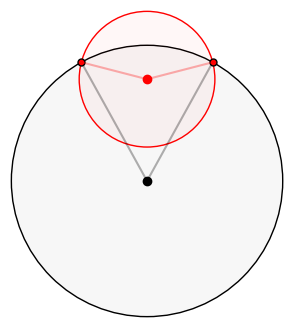

In [54]:
draw(0.75, 0.5)

In this case, the intersection points, which mark the boundaries of the $Q$ and $P$ integrals, can simply be found by equating the two equations, where we rotate the coordinates such that the planet is along $\mathbf{\hat{y}}$:

In [55]:
x0, y0, x, y = sp.symbols("x_\mathrm{o} y_\mathrm{o} x y",real=True)
b, r_p = sp.symbols("b r_\mathrm{o}",real=True,positive=True)

In [56]:
star = x**2+y**2 #The equation for the star
display(Math(r'1 = ' + latex(star)))

<IPython.core.display.Math object>

In [57]:
planet = (x)**2 + (y-y0)**2 #The equation for the planet
display(Math(r'r_o^2 = ' + latex(planet)))

<IPython.core.display.Math object>

In [58]:
display(Math(r'y = ' + latex(sp.solve((star-1)-(planet-r_p**2), y)[0])))

<IPython.core.display.Math object>

Plugging y into the equation for the star (or the planet, but the star is easier), now yields a quadratic equation:

In [59]:
y_equals = sp.solve((star-1)-(planet-r_p**2), y)[0]
quadratic = sp.solve((star-1)-(planet-r_p**2), y)[0]**2 + x**2 -1
display(Math(r'0 = ' + latex(collect(expand(quadratic),x))))

<IPython.core.display.Math object>

In [60]:
display(Math(r'x = ' + latex(sp.solve(x**2+y_equals**2-1, x))))

<IPython.core.display.Math object>

## Oblate planet:

The solution above looks ugly, but nevertheless, there is a closed form solution (two solutions, in fact), for the intersection points when a circular planet occults a circular star (in projection).

In the oblate planet case, the boundaries of the integral are much harder, and result in a quartic equation. 

In [61]:
def draw_oblate(b, xo, yo, ro):
    # Set up the figure
    #theta in degrees
    fig, ax = plt.subplots(1, figsize=(5, 5))
    ax.set_xlim(min(-1.01, xo - ro - 0.01), max(1.01, xo + ro + 0.01));
    ax.set_ylim(min(-1.01, yo - ro - 0.01), max(1.01, yo + ro + 0.01));
    ax.set_aspect(1);
    ax.axis('off');

    # Draw the star
    occulted = Circle((0, 0), 1, fill=False, color='k')
    occulted_fill = Circle((0, 0), 1, fill=True, color='k',alpha=0.03)
    ax.add_artist(occulted)
    ax.add_artist(occulted_fill)
    
    # Draw the planet, multiply semi major and semi minor axes by 2 to get major and minor axes
    occultor = Ellipse((xo, yo), ro*2,ro*b*2, fill=False, color='r')
    occultor_fill = Ellipse((xo, yo), ro*2,ro*b*2, fill=True, color='r',alpha=0.03)
    ax.add_artist(occultor_fill)
    ax.add_artist(occultor)

    ax.plot(0, 0, 'ko')
    ax.plot(xo, yo, 'ro')
    return ax

In [62]:
star = x**2+y**2 #The equation for the star
display(Math(r'1 = ' + latex(star)))

<IPython.core.display.Math object>

In [63]:
planet = (x-x0)**2 + (y-y0)**2/b**2 #The equation for the planet
display(Math(r'r_o^2 = ' + latex(planet)))

<IPython.core.display.Math object>

Now expand out $(y-y_0)^2$ as follows:

$$\frac{y^{2} - 2 y y_\mathrm{o} + y_\mathrm{o}^{2}}{b^2} = r_{\mathrm{o}}^{2} - \left(x - x_\mathrm{o}\right)^{2}$$

then, substitute $y^2$ with a function of x

In [64]:
y_squared = (r_p**2-(x-x0)**2)*b**2 + 2*y*y0-y0**2
display(Math(r'y^2 = ' + latex(y_squared)))

<IPython.core.display.Math object>

Set $y^2$ terms equal to each other:

In [65]:
display(Math(r'0 = ' + latex(y_squared-(1-x**2))))

<IPython.core.display.Math object>

Now finally, solve for y:

In [66]:
display(Math(r'y = ' + latex(sp.solve(((1-x**2) - y_squared), y)[0])))

<IPython.core.display.Math object>

In [67]:
quartic = (sp.solve(((1-x**2) - y_squared), y)[0])**2 - (1-x**2)
quartic = collect(expand(quartic),x)
quartic

b**4*r_\mathrm{o}**4/(4*y_\mathrm{o}**2) - b**4*r_\mathrm{o}**2*x_\mathrm{o}**2/(2*y_\mathrm{o}**2) + b**4*x_\mathrm{o}**4/(4*y_\mathrm{o}**2) - b**2*r_\mathrm{o}**2/2 - b**2*r_\mathrm{o}**2/(2*y_\mathrm{o}**2) + b**2*x_\mathrm{o}**2/2 + b**2*x_\mathrm{o}**2/(2*y_\mathrm{o}**2) + x**4*(b**4/(4*y_\mathrm{o}**2) - b**2/(2*y_\mathrm{o}**2) + 1/(4*y_\mathrm{o}**2)) + x**3*(-b**4*x_\mathrm{o}/y_\mathrm{o}**2 + b**2*x_\mathrm{o}/y_\mathrm{o}**2) + x**2*(-b**4*r_\mathrm{o}**2/(2*y_\mathrm{o}**2) + 3*b**4*x_\mathrm{o}**2/(2*y_\mathrm{o}**2) + b**2*r_\mathrm{o}**2/(2*y_\mathrm{o}**2) - b**2*x_\mathrm{o}**2/(2*y_\mathrm{o}**2) + b**2/2 + b**2/(2*y_\mathrm{o}**2) + 1/2 - 1/(2*y_\mathrm{o}**2)) + x*(b**4*r_\mathrm{o}**2*x_\mathrm{o}/y_\mathrm{o}**2 - b**4*x_\mathrm{o}**3/y_\mathrm{o}**2 - b**2*x_\mathrm{o} - b**2*x_\mathrm{o}/y_\mathrm{o}**2) + y_\mathrm{o}**2/4 - 1/2 + 1/(4*y_\mathrm{o}**2)

Finally, we have a polynomial of the form: $$Ax^4 + Bx^3 + Cx^2 + Dx + E = 0$$

where A, B, C, D and E are given below (yes it's complicated):

In [68]:
collect(expand(simplify(quartic)),x)

b**4*r_\mathrm{o}**4/(4*y_\mathrm{o}**2) - b**4*r_\mathrm{o}**2*x_\mathrm{o}**2/(2*y_\mathrm{o}**2) + b**4*x_\mathrm{o}**4/(4*y_\mathrm{o}**2) - b**2*r_\mathrm{o}**2/2 - b**2*r_\mathrm{o}**2/(2*y_\mathrm{o}**2) + b**2*x_\mathrm{o}**2/2 + b**2*x_\mathrm{o}**2/(2*y_\mathrm{o}**2) + x**4*(b**4/(4*y_\mathrm{o}**2) - b**2/(2*y_\mathrm{o}**2) + 1/(4*y_\mathrm{o}**2)) + x**3*(-b**4*x_\mathrm{o}/y_\mathrm{o}**2 + b**2*x_\mathrm{o}/y_\mathrm{o}**2) + x**2*(-b**4*r_\mathrm{o}**2/(2*y_\mathrm{o}**2) + 3*b**4*x_\mathrm{o}**2/(2*y_\mathrm{o}**2) + b**2*r_\mathrm{o}**2/(2*y_\mathrm{o}**2) - b**2*x_\mathrm{o}**2/(2*y_\mathrm{o}**2) + b**2/2 + b**2/(2*y_\mathrm{o}**2) + 1/2 - 1/(2*y_\mathrm{o}**2)) + x*(b**4*r_\mathrm{o}**2*x_\mathrm{o}/y_\mathrm{o}**2 - b**4*x_\mathrm{o}**3/y_\mathrm{o}**2 - b**2*x_\mathrm{o} - b**2*x_\mathrm{o}/y_\mathrm{o}**2) + y_\mathrm{o}**2/4 - 1/2 + 1/(4*y_\mathrm{o}**2)

In [69]:
A, B, C, D, E = Poly(quartic,x).coeffs()

In [70]:
simplify(A)

(b**4 - 2*b**2 + 1)/(4*y_\mathrm{o}**2)

In [71]:
simplify(B)

b**2*x_\mathrm{o}*(1 - b**2)/y_\mathrm{o}**2

In [72]:
simplify(C)

(-b**4*r_\mathrm{o}**2 + 3*b**4*x_\mathrm{o}**2 + b**2*r_\mathrm{o}**2 - b**2*x_\mathrm{o}**2 + b**2*y_\mathrm{o}**2 + b**2 + y_\mathrm{o}**2 - 1)/(2*y_\mathrm{o}**2)

In [73]:
simplify(D)

b**2*x_\mathrm{o}*(b**2*r_\mathrm{o}**2 - b**2*x_\mathrm{o}**2 - y_\mathrm{o}**2 - 1)/y_\mathrm{o}**2

In [74]:
simplify(E)

(b**4*r_\mathrm{o}**4 - 2*b**4*r_\mathrm{o}**2*x_\mathrm{o}**2 + b**4*x_\mathrm{o}**4 - 2*b**2*r_\mathrm{o}**2*y_\mathrm{o}**2 - 2*b**2*r_\mathrm{o}**2 + 2*b**2*x_\mathrm{o}**2*y_\mathrm{o}**2 + 2*b**2*x_\mathrm{o}**2 + y_\mathrm{o}**4 - 2*y_\mathrm{o}**2 + 1)/(4*y_\mathrm{o}**2)

In [75]:
def coeffs(b, xo, yo, ro):
    """
    Polynomial coefficients A, B, C, D and E coded up as a python function.
    A, B, C, D and E all have a denominator of yo^2 which has been factored out
    for numerical stability at yo -> 0.
    """
    A = (b**4 - 2*b**2 + 1)/(4)
    B = (-b**4*xo + b**2*xo)
    C = (-b**4*ro**2 + 3*b**4*xo**2 + b**2*ro**2 - b**2*xo**2 + b**2*yo**2 + b**2 + yo**2 - 1)/(2)
    D = (b**4*ro**2*xo - b**4*xo**3 - b**2*xo*yo**2 - b**2*xo)
    E = (b**4*ro**4 - 2*b**4*ro**2*xo**2 + b**4*xo**4 - 2*b**2*ro**2*yo**2 - 2*b**2*ro**2 + 2*b**2*xo**2*yo**2 + 2*b**2*xo**2 + yo**4 - 2*yo**2 + 1)/(4)
    return np.array([A, B, C, D, E])

# Four cases:

As a result of the quartic equation, there are 4 possible cases depending on how many real roots the quartic solution has. These are enumerated below:

## Case 1 (no intersections):

If there are no real roots to the quartic, the planet may be entirely inside the star, or entirely outside

In [76]:
ro = 0.4
b = 1-0.3 # (b=1-f)
xo = 0.1
yo = 0.1
coeff = coeffs(b, xo, yo, ro)
r=np.roots(coeff)
x_real = r.real[np.abs(r.imag)<1e-5]
y_real = (-b**2*ro**2 + b**2*(x_real - xo)**2 - x_real**2 + yo**2 + 1)/(2*yo)

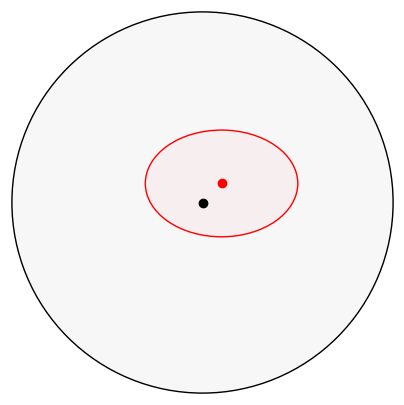

In [77]:
ax = draw_oblate(b, xo, yo, ro)
ax.plot(x_real, y_real, 'ko');

In [78]:
ro = 0.4
b = 1-0.3 # (b=1-f)
xo = 1.5
yo = 0.9
coeff = coeffs(b, xo, yo, ro)
r=np.roots(coeff)
x_real = r.real[np.abs(r.imag)<1e-5]
y_real = (-b**2*ro**2 + b**2*(x_real - xo)**2 - x_real**2 + yo**2 + 1)/(2*yo)

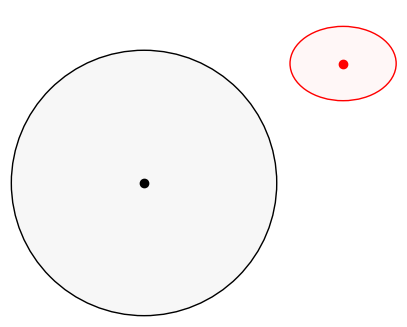

In [79]:
ax = draw_oblate(b, xo, yo, ro)
ax.plot(x_real, y_real, 'ko');

## Case 2 (one intersection):

In an edge case, the planet may have exactly one point intersecting the star

In [98]:
ro = 0.4
b = 1-0.3 # (b=1-f)
xo = -0.65
yo = 0.0 #division by 0 error if 0
coeff = coeffs(b, xo, yo, ro)
r=np.roots(coeff)
x_real = r.real[np.abs(r.imag)<1e-5]
y_real = np.sqrt((1-x_real**2))

/var/folders/_t/bqm0d4gd4gb4w_d2p9j445h00000gq/T/ipykernel_6243/28056125.py:8: RuntimeWarning: invalid value encountered in sqrt
  y_real = np.sqrt((1-x_real**2))


In [97]:
x_real

array([ 2.23789218,  2.23789218, -0.98887256, -0.98887259])

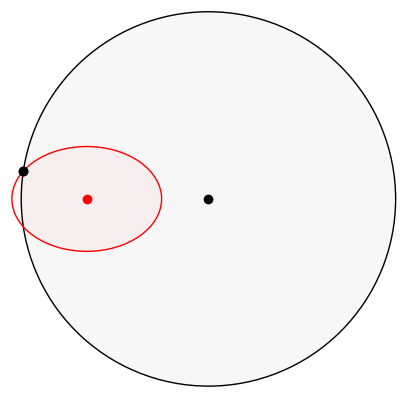

In [96]:
ax = draw_oblate(b, xo, yo, ro)
ax.plot(x_real, y_real, 'ko');

## Case 3 (two intersections):

In the vast majority of real life scenarios of a planet where $r_{\mathrm{planet}} << r_{\mathrm{star}}$ during ingress and egress, there will be two intersection points

In [86]:
ro = 0.4
b = 1-0.3 # (b=1-f)
xo = 0.8
yo = 0.4 #division by 0 error if 0
coeff = coeffs(b, xo, yo, ro)
r=np.roots(coeff)
x_real = r.real[np.abs(r.imag)<1e-5]
y_real = np.sqrt(1-x_real**2)

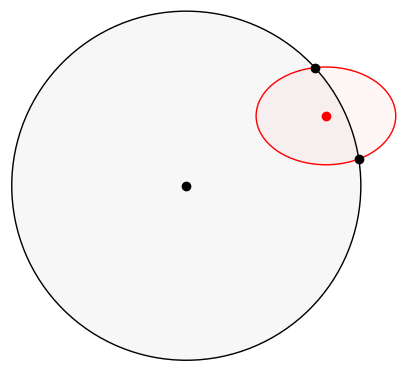

In [87]:
ax = draw_oblate(b, xo, yo, ro)
ax.plot(x_real, y_real, 'ko');

## Case 4 (four intersections):

If the occultor is about the same size as the occulted object, there may be 4 intersections. Note that this cannot happen for two circular objects. 

In [88]:
ro = 1.0
b = 1-0.3 # (b=1-f)
xo = 0.001
yo = 0.2 #division by 0 error if 0
coeff = coeffs(b, xo, yo, ro)
r=np.roots(coeff)
x_real = r.real[np.abs(r.imag)<1e-5]
y_real = np.sqrt(1-x_real**2)

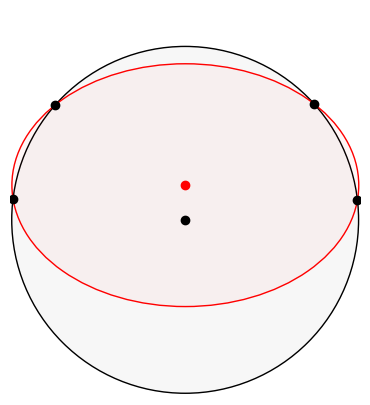

In [89]:
ax = draw_oblate(b, xo, yo, ro)
ax.plot(x_real, y_real, 'ko');